In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import math

# 7 Stats Background

## 7.1 General
- **Prediction**: Whats the price of the house given its features vs. **Inference**: How do certain features affect the price
- **Parametric method**: Make assumption about the shape of our function, then find the best parameters for that function (i.e. $\beta_i$ for linear regression) vs. **Non-Parametric method**: no assumption about the shape of our function so large number of observation is needed to obtain accurate estimate of the function (i.e. KNN)
- **Joint probability**: Probability of two events occurring simultaneously vs. **Marginal probability**: Probability of an event irrespective of the outcome of another variable vs. **Conditional probability**: Probability of one event occurring in the presence of a second event
- **Degrees of freedom**: Refer to the number of free parameters in i.e. a model
- **Prospective sampling**: Fix the predictors first then observe the outpu vs. **Retrospective smapling**: Fix the outcome first then observe the predictors

## 7.2 Distributions
- Uniform:
    * Description: All events are equally likely on an interval of [a, b]
    * Parameters: $a$ - lower bound, $b$ - upper bound

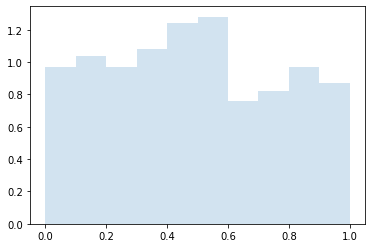

In [40]:
r = stats.uniform.rvs(size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

- Binomial:
    * Description: Sequence of Bernoulli trials counting the number of successes in a sequence of n independent experiments
    * Parameters: $n$ - number of trials, $p$ - success probability for each trial

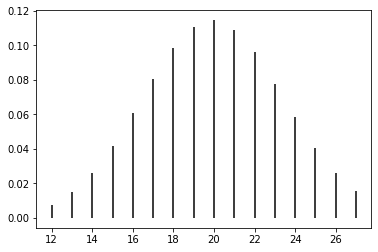

In [41]:
n = 50
p = 0.4
rv = stats.binom(n, p)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.vlines(x, 0, rv.pmf(x))
plt.show()

- Normal:
    * Description: Bell shaped distribution without tails
    * Parameters: $\mu$ - mean, $\sigma^2$ - variance

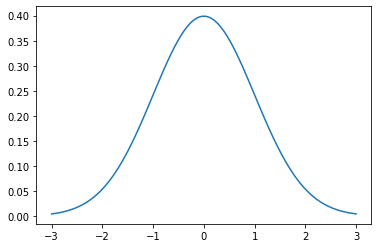

In [42]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

- Student t-distribution:
    * Description: Bell shaped distribution with fatter tails, meaning that it is more prone to producing values that fall far from its mean; standard deviation unknown
    * Parameters: $v$ - degrees of freedom

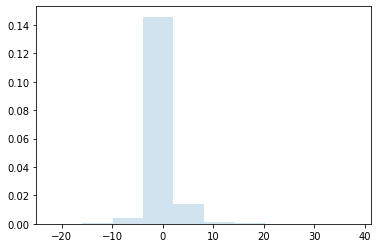

In [47]:
df = 2
x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), 100)
rv = stats.t(df)
r = stats.t.rvs(df, size=1000)
plt.hist(r, density=True, alpha=0.2)
plt.show()

- Chi-Squared:
    * Description: Right tail is fat, the higher the degrees of freedom, the colser we get to the normal distribution; used for hypothesis testing
    * Parameters: $k$ - degrees of freedom = mean
    
<img src="https://actuarialmodelingtopics.files.wordpress.com/2016/11/chi-squared-densities-df-1-2-3-5-10.jpg"
     width="500" height="300" />     

- Exponential:
    * Description: Probability distribution of time between events, i.e. a process in which events occur continuously and independently at a constant average rate
    * Parameters: $\lambda$ - scale; mean = $\frac{1}{\lambda}$
    
<img src="https://ai-master.gitbooks.io/probability-distributions-and-properties/content/assets/image119.png"
     width="500" height="300" />

- Poisson:
    * Description: Sequence of many Bernoulli trials where success becomes a rare event; if we increase lambda it quickly becomes a normal distribution
    * Parameters: $\lambda$ - expected number of events per unit of time = mean
    
<img src="https://loonylabs.files.wordpress.com/2019/09/poisson.gif?w=472&zoom=2"
     width="500" height="300" />   

- Negative Binomial:
    * Description: Sequence of many Bernoulli trials counting the number of failures before achieving a given number of successes 
    * Parameters: $r$ - number of successes until the trial is stopped
    
<img src="https://www.mathworks.com/help/examples/stats/win64/ComputeAndPlotNegativeBinomialDistributionPDFExample_01.png"
     width="500" height="300" />   

- Gamma:
    * Description:$\chi^2$ and exponential distribution are special cases of the gamma distribution
    * Parameters: $\alpha$ - shape; $\theta$ - scale or $\beta$ - scale depending on probability density function
    
<img src="https://www.statisticshowto.com/wp-content/uploads/2014/01/gamma-distribution-alpha.png"
     width="500" height="300" />   

## 7.3 Links
- The link is a funciton $g()$ connecting the linear predictor $\eta = \beta_0 + \sum{\beta_iX_i}$ and the expected output $\mu = E[Y]$: $g(\mu)=\eta$
- In the classical linear model $g(\mu)=\mu=\eta$; the linear predictor and expected outcome are identical, hence the link becomes identical function by construction as a result of least-squared method, since $\mu$ and $\eta$ are real numbers
- When the output originates from i.e. counts and the distribution is no longer normal but Poisson; in order to still be able to match the domains of the expected outcome and the linear predictor, we use a link: i.e. $log(\mu) = \eta$
- When the output is binomial the link is usually Logit, Probit, or Complementary log-log
- The different transformations only have an impact on a given range
- Once the transformation is complete, the relationship between the predictors and the response can be modeled with linear regression

## 7.3 Maximum Likelihood Estimation
- Goal: Find the optimal way to fit a distribution to output data; the optimal way refers to the ideal parameters for a given distribution
- Maximum log-likelihood (MLE) estimates parameters of generalized models and is an alternative to the method of minimizing least squares (MLS) (note that for Gaussian distribution the MLE returns the same results as for MLS, this however is not true for other distributions)
- We start by assuming a distribution of our output variable (i.e. Gaussian, Poisson) to select the respective likelihood function, which differ for each distribution
- We then need to find parameters (i.e. $\mu$, $\sigma$) that maximize the respective likelihood function, meaning that we can predict the output $Y$ with the highest likelihood:
    * We can apply optimization methods such as $Newton$-$Raphson$ $Method$ that perform a direct search for the maximum of the function
    * We can also solve the equation $L'(\theta, Y) = 0$ with respect to $\theta$ (all parameters that need to be estimated for that likelihood function)
- We can use the likelihood ratio to perform Chi-Squared tests to test if the estimated $\theta$ is likely to be the true parameter of the function: $-2(L(\theta_0; Y) - L(\hat{\theta}; Y)) ~ Chi(1)$, where $\theta_0$ - saturated model, $\hat{\theta}$ - MLE parameters
- Measurement of the goodness of fit:
    * The log-likelihood ratio statistic comparing the saturated model with the estimated model is called deviance: $Deviance = 2\sigma^2(L(\mu^{saturated}; Y) - L(\mu^{MLE}; Y)$
    * In order to determine whether the deviance is too large/small we compare the deviance against: $df +/- \sqrt{2*df}$, where $df$ are degrees of freedom
    * Null Deviance shows how well the response variable is predicted by a model that includes only the intercept

## 7.3 Dispersion
- Overdispersion: Presence of higher variability than would be expected based on a given model (variance > mean for Poisson) and vice versa for underdispersion
- If in a Poisson process, there is over-dispersion, we can fit a negative binomial distribution instead as it then metamorphs into Poisson distribution 
- Reasons for overdispersion:
    * Outliers in the data
    * Violation of independent Bernoulli trials or Poisson events
    * Time-dependent probability of success in case of binomial distribution or time-dependent intensity of a Poisson process
    * Increased number of zeros in the sample
- Methods for dealing with overdispersion due to an increase number of zeros:
    * **Hurdle model**: Combination of 1) model producing only zeros and 2) model producing only positive counts (zero-truncated model); hurdle models can be based on Poisson or Negative Binomial models
    * **Zero-inflated model**: Combination of 1) zero-producing model (logistic) and 2) regular Poisson or Negative Binomial model; $P(y_i = 0) = p_i + (1-p_i)e^{-\lambda_i}$ and $P(y_i=k) = (1-p_i)\frac{e^{-\lambda_i}\lambda_i^k}{k!}$

## 7.3 Contingency Tables
- Contingency tables are used for $\chi^2$-test of independency of factors (i.e. is one variable affected be the other)
- Contingency tables contain information about joint and marginal distributions
- $Y$ needs to be the number of observations observed with the corresponding combinations of factors
- We can then calculate the mean count of every cell to build the $\chi^2$-statistic: $\chi^2 = \sum{\frac{(y_{ij}-\mu_{ij})^2}{\mu_{ij}}}$
- If this is distributed as $\chi^2((I-1)(J-1))$, where $I$ and $J$ - number of levels of each factor, the factors are indeed independent 
- Generilzed linear model (glm) approach:
    * If we want to fit a glm, we need to use traditional data tables
    * We can also test for independency of features with the glm approach by fitting a saturated model (with interaction terms) and a model without interaction terms; if the two are the same, there is no interaction and the features are hence independent
    * Which glm we fit depends on the underlying distribution of the data (i.e. Poisson, Negative Binomial, Multinomial)

## 7.3 Fixed & Random Effects
- We further deviate from the standard linear model with $\epsilon$ not being independent and identically distributed (i.i.d.) and distributed as Gaussian, but instead following an undesired pattern
- Recall: The goal of ANOVA is to to find if different levels/treatments of the predictor/factor have different effects; we hence test the H0: are all group mean values equal?; categorical predictors require dummy coding, leading to large number of levels, less degrees of freedom, and loss in accuracy; ANOVA returns group mean values as predictions 
- Fixed effect:
    * We add additional predictors (hence special intercepts) to our model, further grouping the data by the additional factors (we extend our model)
    * As a result only data points within the same group inform the prediction
    * However, assigning each group a mean becomes inefficient as their number grows, because each categorical factor that is added adds one dummy variable per level of the factor, decreasing the degrees of freedom of the model
- Random effect:
    * Instead of the fixed effects, we can add one random effect that interprets the fixed intercepts as realizations of random variables (i.e. resistance to drug depends on mutation of virus; instead of treating each mutation as a fixed effect we assume that mutations are randomly distributed) 
    * This transforms the error structure, introducing additional sources of randomness and with them heteroscedasticity
    * The ANOVA model becomes: $y_{ij}=\mu+\alpha_i+\epsilon_{ij}$, where $i$ - group number and $j$ - individual number within group; with the H0 being: is $\sigma_{\alpha} = 0$
    * Random effects add serial correlation, because observations within the same group are correlated and hence if $\sigma_{\alpha} = 0$ the effect is fixed and not random
    * Hence, in a model with random effects all data points inform the prediction, leading to shrinkage of the group means towards the grand mean compared to a model with fixed effects by a relative ratio of $\frac{fixed~effects}{random~effects}$
- In order to find the fixed/random effect, subtract the grand mean from the repsective group means
- The goal will be to determine whether to include factors as fixed or random effect in the final model